Ejemplo para la clase de inteligencia artificial, Universidad del Magdalena. Este ejemplo está construido con el conjunto de datos Wine Quality, la cual fue descargdada de https://www.kaggle.com/datasets/rajyellow46/wine-quality?rvi=1. El objetivo del ejemplo es ilustrar distintos tipos de regresión para predecir la calidad del vino con base en ciertas características físico químicas.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [5]:
wineData = pd.read_csv('winequalityN.csv')
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Inspección del conjunto de datos

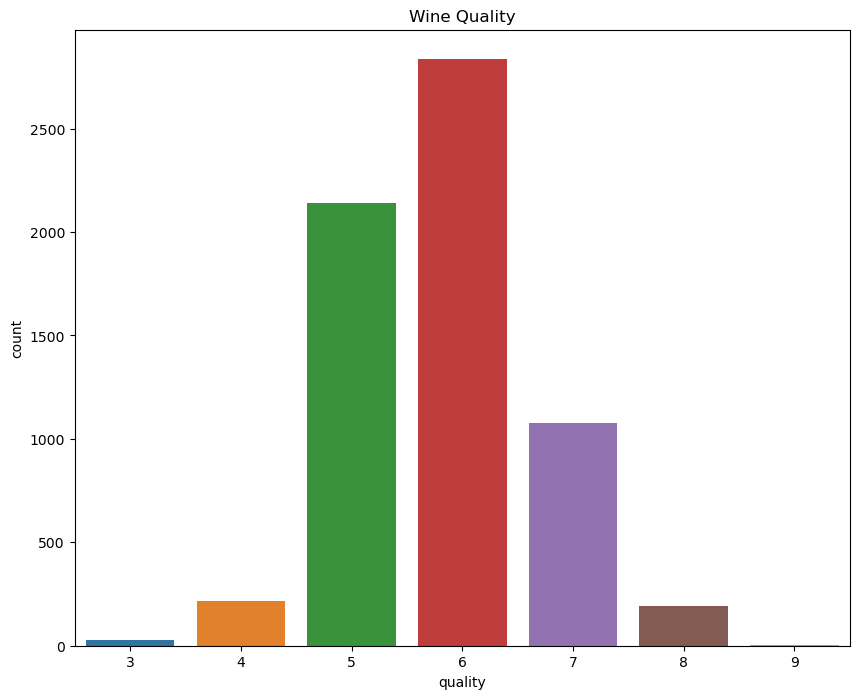

In [6]:
#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='quality',data=wineData)
plt.title("Wine Quality")
plt.show()

Se trata de un conjunto de datos desbalanceado con vinos de ejemplos evaluados en una escala de 3 a 9.

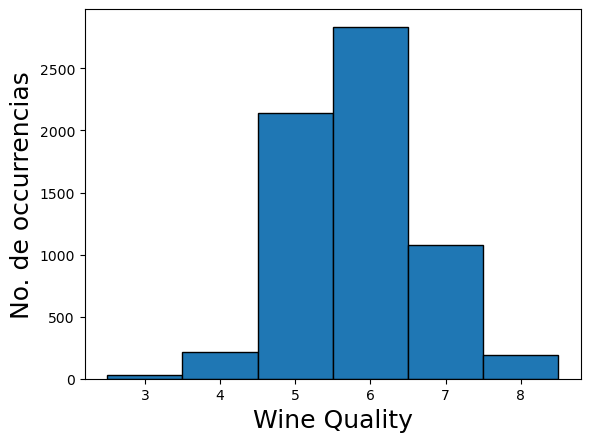

In [7]:
plt.hist(wineData.quality.values,bins=[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5],edgecolor = 'black')
plt.xlabel('Wine Quality', fontsize = 18)
plt.ylabel('No. de occurrencias', fontsize = 18)
plt.show()

Revisando si hay valores faltantes

In [8]:
wineData.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Conversión de una variable categórica a numérica. Esto es necesario para utilizar el método de rellenado de datos faltantes que sigue a continuación.

In [9]:
wine_types = pd.get_dummies(wineData['type'])
wineData = wineData.drop('type',axis=1) #Elimina la variable State de X, y se queda con las nuevas variables creadas por cada categoría
wineData = pd.concat([wineData, wine_types],axis=1)
print(wineData.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality    red  white  
0      8.8        6  False   True  
1      9.5    

Rellenando datos faltantes con KNNImputer

In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
wineData = pd.DataFrame(imputer.fit_transform(wineData), columns=wineData.columns)
wineData.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red                     0
white                   0
dtype: int64

Inspeccionando la distribución de los valores de las variables predictoras.

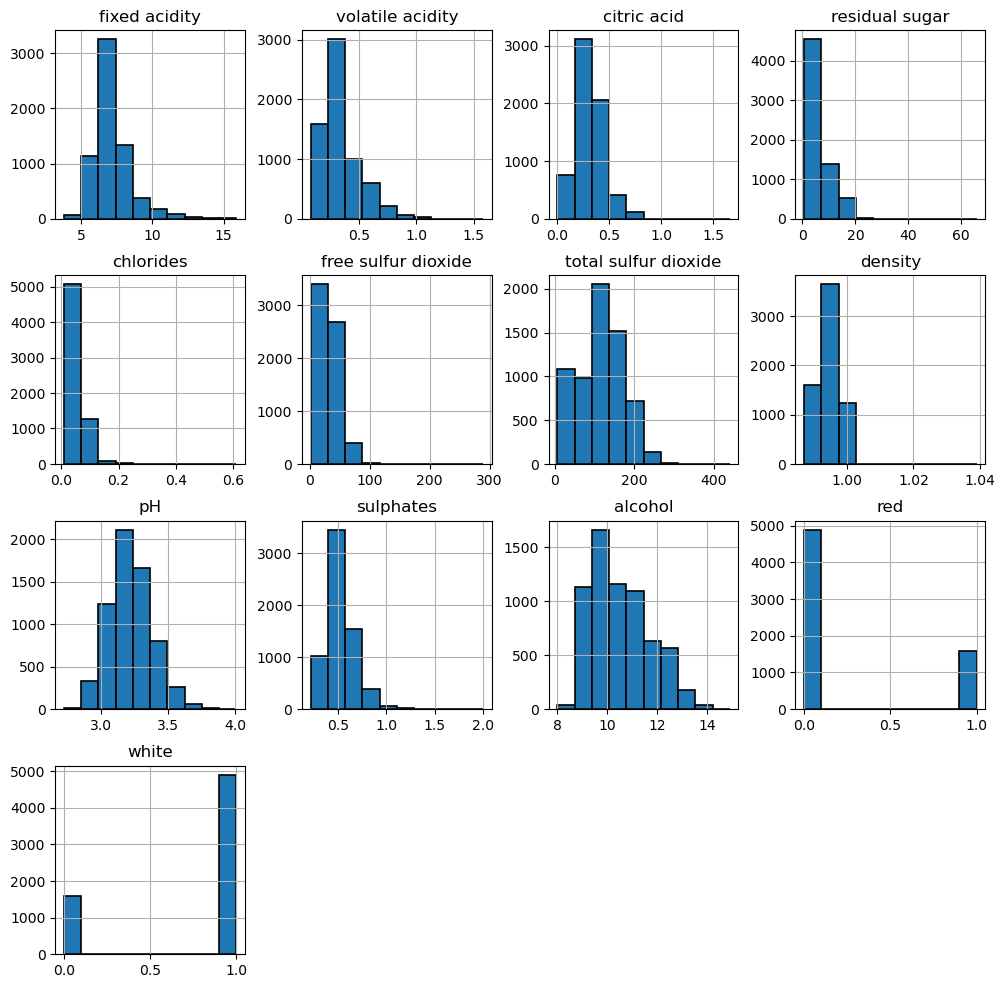

In [11]:
X = wineData.drop('quality', axis=1)
X.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Se utiliza correlación de Spearman por la posibilidad de no contar con variables normalmente distribuidas.

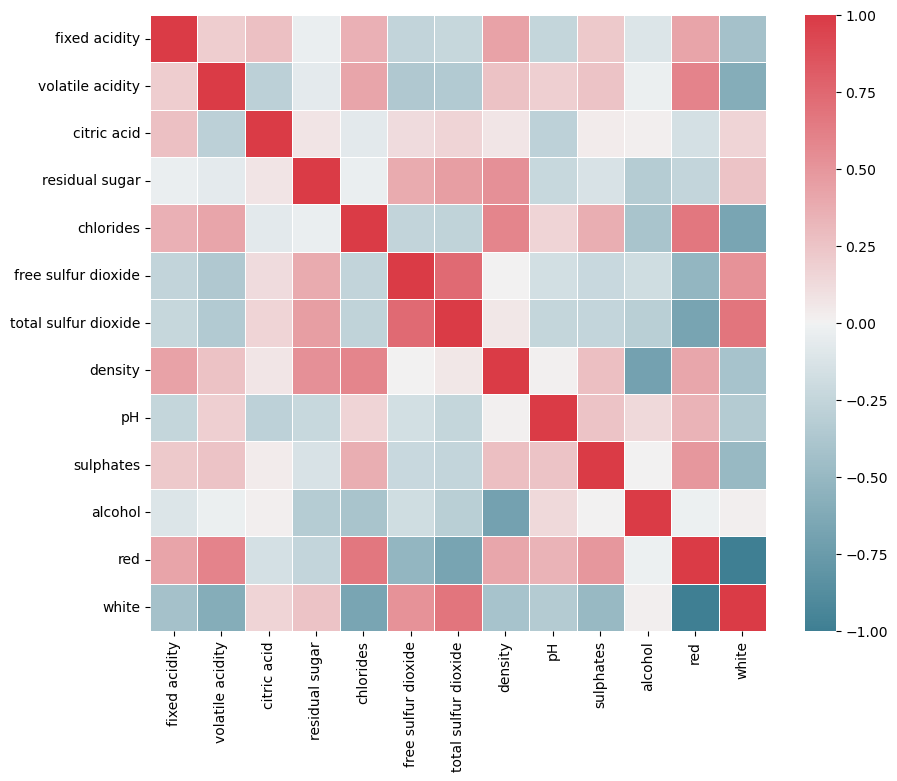

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr(method='spearman')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
          cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, linewidths=.5)
plt.show() 

# Regresión numérica

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = wineData['quality'] 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
y_train_predicted = regressor.predict(X_train)
score_MSE = mean_squared_error(y_train, y_train_predicted, squared = False)
print(score_MSE)

0.7254905020258159


In [17]:
y_test_predicted = regressor.predict(X_test)
print(mean_squared_error(y_test, y_test_predicted, squared = False))

0.7487788427658562


Probemos regresión Ridge

In [20]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha = 10)
rd.fit(X_train, y_train)
y_train_predicted_Rd = rd.predict(X_train)
score_MSE_Rd = mean_squared_error(y_train, y_train_predicted_Rd, squared = False)
print(score_MSE_Rd)

0.725506588841783


In [19]:
y_test_predicted_Rd = rd.predict(X_test)
print(mean_squared_error(y_test, y_test_predicted_Rd, squared = False))

0.7486875025919467


In [23]:
print('Coeficientes con 0 {}'.format(
    np.sum(rd.coef_ == 0)))

Coeficientes con 0 0
